In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

CSV-файл содержит полный набор данных об автомобилях, используемых для прогнозирования цен. Каждая строка представляет собой отдельный автомобиль, а каждый столбец — определённую характеристику, которая может влиять на его рыночную стоимость.  
Краткое описание столбцов  
**Car ID** - уникальный идентификатор автомобиля  
**Brand** - марка (Toyota, BMW, Ford)  
**Year** - год выпуска (2018, 2020)  
**Engine Size** - объём двигателя в литрах (1.6, 2.0, 3.5)  
**Fuel Type** - тип топлива (Бензин, Дизель, Электрический)  
**Transmission** - коробка передач (Автомат, Механика)  
**Mileage** - пробег в км    
**Condition** - состояние  
**Price** - цена в валюте  
**Model** - модель автомобиля  



In [107]:
df = pd.read_csv('cars.csv', sep=',', decimal='.')
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


Приведем название столбцов к pep-8

In [109]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,car_id,brand,year,engine_size,fuel_type,transmission,mileage,condition,price,model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_id        2500 non-null   int64  
 1   brand         2500 non-null   object 
 2   year          2500 non-null   int64  
 3   engine_size   2500 non-null   float64
 4   fuel_type     2500 non-null   object 
 5   transmission  2500 non-null   object 
 6   mileage       2500 non-null   int64  
 7   condition     2500 non-null   object 
 8   price         2500 non-null   float64
 9   model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


Приведём типы object к category

In [112]:
df['brand'] = df['brand'].astype('category')
df['fuel_type'] = df['fuel_type'].astype('category')
df['transmission'] = df['transmission'].astype('category')
df['condition'] = df['condition'].astype('category')
df['model'] = df['model'].astype('category')

In [113]:
df.describe()

,car_id,year,engine_size,mileage,price
count,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2011.6268,3.465240,149749.844800,52638.022532
std,721.83216,6.9917,1.432053,87919.952034,27295.833455
min,1.00000,2000.0000,1.000000,15.000000,5011.270000
25%,625.75000,2005.0000,2.200000,71831.500000,28908.485000
50%,1250.50000,2012.0000,3.400000,149085.000000,53485.240000
75%,1875.25000,2018.0000,4.700000,225990.500000,75838.532500
max,2500.00000,2023.0000,6.000000,299967.000000,99982.590000


In [114]:
def missing(df, df_name):
    count = len(df)
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / count) * 100
    missing_df = pd.DataFrame({
        'количество_пропусков': missing_data,
        'процент_пропусков': round(missing_percent, 2)
    })
    print(df_name, '\n')
    print(f'Всего строк: {count}\n')
    print(missing_df, '\n')
    print('Столбцы с пропущенными значениями:\n')
    print(missing_df[missing_df['количество_пропусков']>0])

In [115]:
missing_users = missing(df, 'cars')

cars 

Всего строк: 2500

              количество_пропусков  процент_пропусков
car_id                           0                0.0
brand                            0                0.0
year                             0                0.0
engine_size                      0                0.0
fuel_type                        0                0.0
transmission                     0                0.0
mileage                          0                0.0
condition                        0                0.0
price                            0                0.0
model                            0                0.0 

Столбцы с пропущенными значениями:

Empty DataFrame
Columns: [количество_пропусков, процент_пропусков]
Index: []


In [116]:
def dup(df, df_name):
    duplicate = df.duplicated().sum()
    print(df_name.upper())
    return print('Количество дубликатов: ', duplicate)

In [121]:
dup(df, 'cars')

CARS
Количество дубликатов:  0


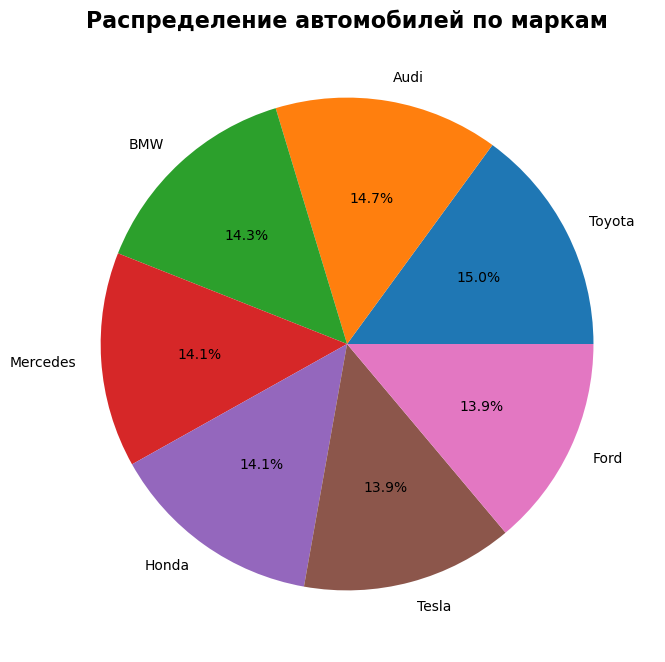

In [150]:
brand_distribution = df['brand'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(brand_distribution.values, labels=brand_distribution.index, autopct='%1.1f%%')
plt.title('Распределение автомобилей по маркам', fontsize=16, fontweight='bold')
plt.show()

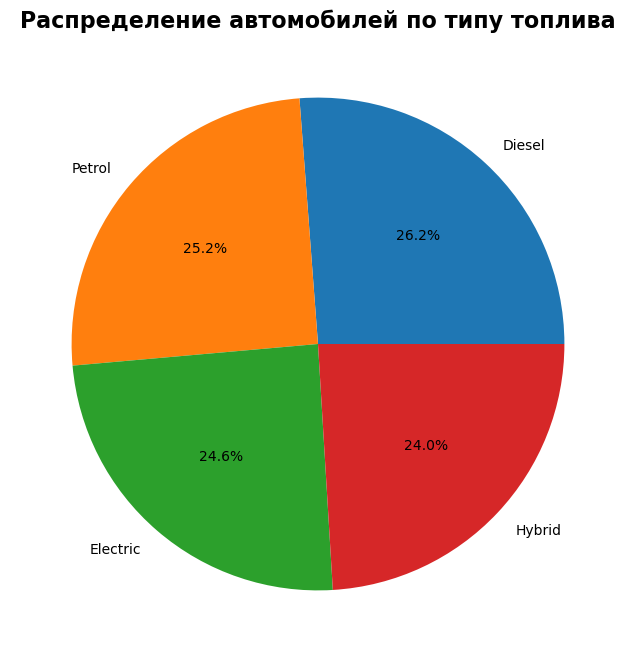

In [128]:
fuel_distribution = df['fuel_type'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(fuel_distribution.values, labels=fuel_distribution.index, autopct='%1.1f%%')
plt.title('Распределение автомобилей по типу топлива', fontsize=16, fontweight='bold')
plt.show()

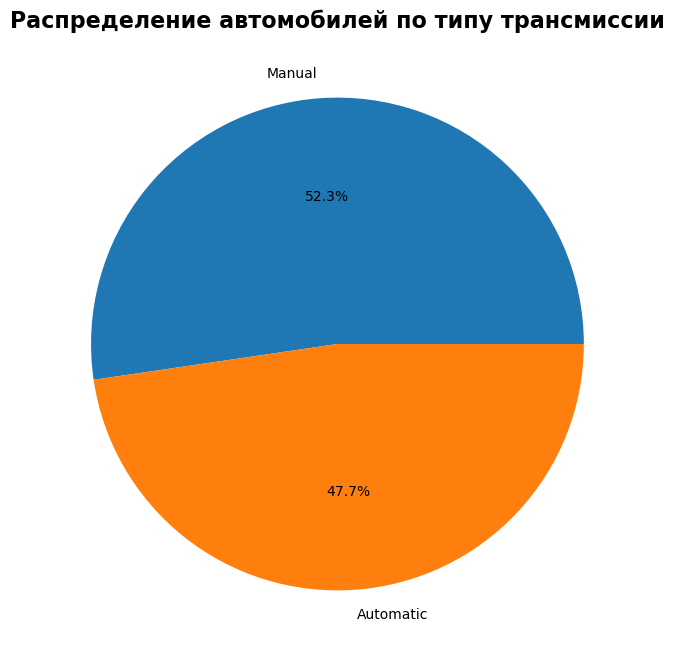

In [130]:
transmission_distribution = df['transmission'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(transmission_distribution.values, labels=transmission_distribution.index, autopct='%1.1f%%')
plt.title('Распределение автомобилей по типу трансмиссии', fontsize=16, fontweight='bold')
plt.show()

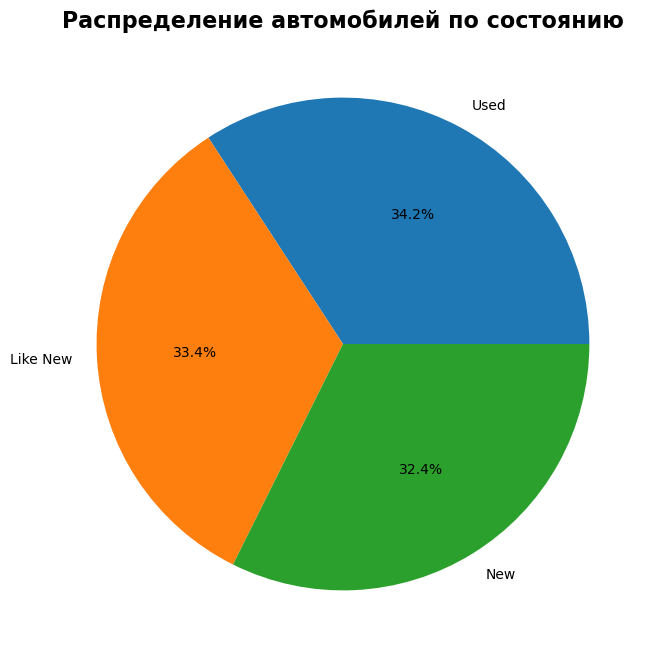

In [132]:
condition_distribution = df['condition'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(condition_distribution.values, labels=condition_distribution.index, autopct='%1.1f%%')
plt.title('Распределение автомобилей по состоянию', fontsize=16, fontweight='bold')
plt.show()

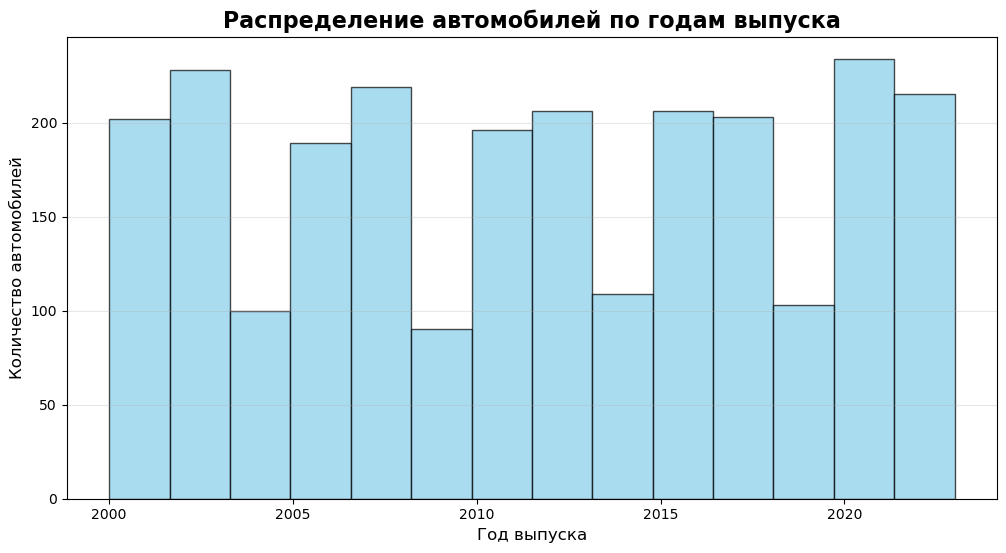

In [134]:
plt.figure(figsize=(12, 6))
plt.hist(df['year'], bins=14, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Распределение автомобилей по годам выпуска', fontsize=16, fontweight='bold')
plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Количество автомобилей', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

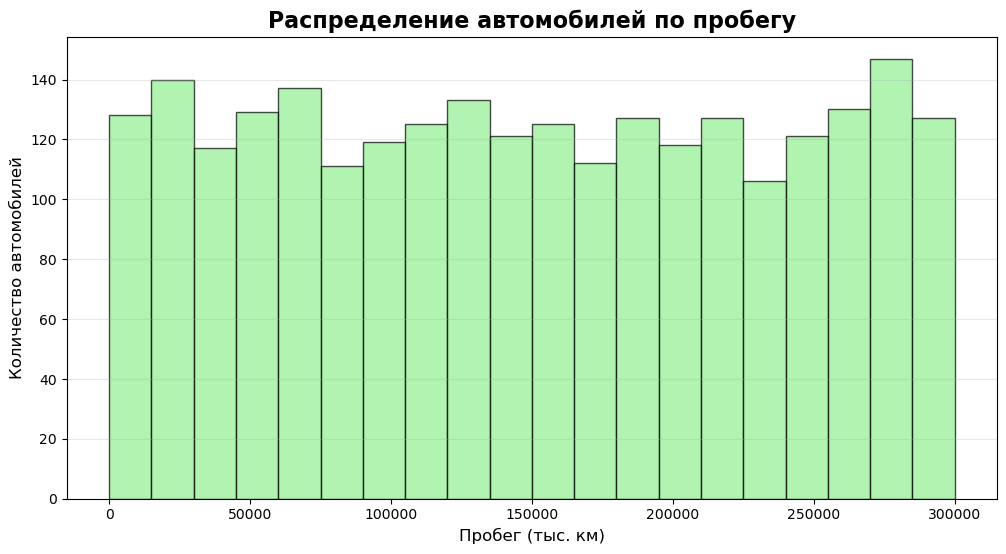

In [137]:
plt.figure(figsize=(12, 6))
plt.hist(df['mileage'], bins=20, edgecolor='black', alpha=0.7, color='lightgreen')
plt.title('Распределение автомобилей по пробегу', fontsize=16, fontweight='bold')
plt.xlabel('Пробег (тыс. км)', fontsize=12)
plt.ylabel('Количество автомобилей', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

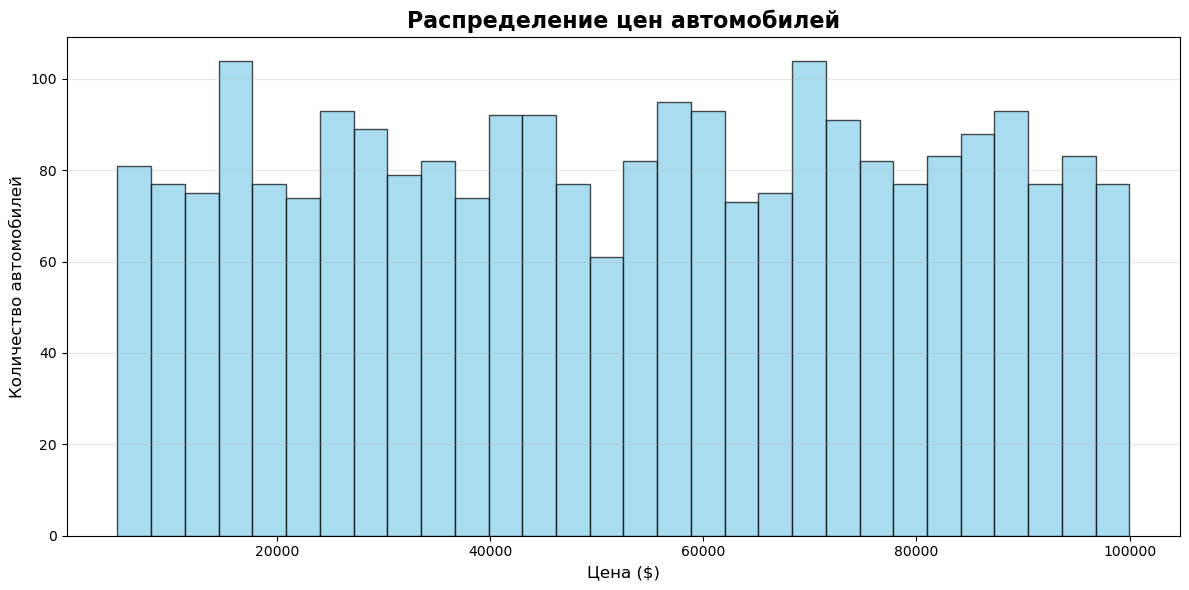

In [139]:
plt.figure(figsize=(12, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение цен автомобилей', fontsize=16, fontweight='bold')
plt.xlabel('Цена ($)', fontsize=12)
plt.ylabel('Количество автомобилей', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Посмотрим на корреляции между числовыми признаками

In [143]:
numeric_df = df[['year', 'price', 'mileage', 'engine_size']]
corr_matrix = numeric_df.corr()

-1.0 : идеальная отрицательная корреляция  
0.0 : отсутствие корреляции  
+1.0 : идеальная положительная корреляция

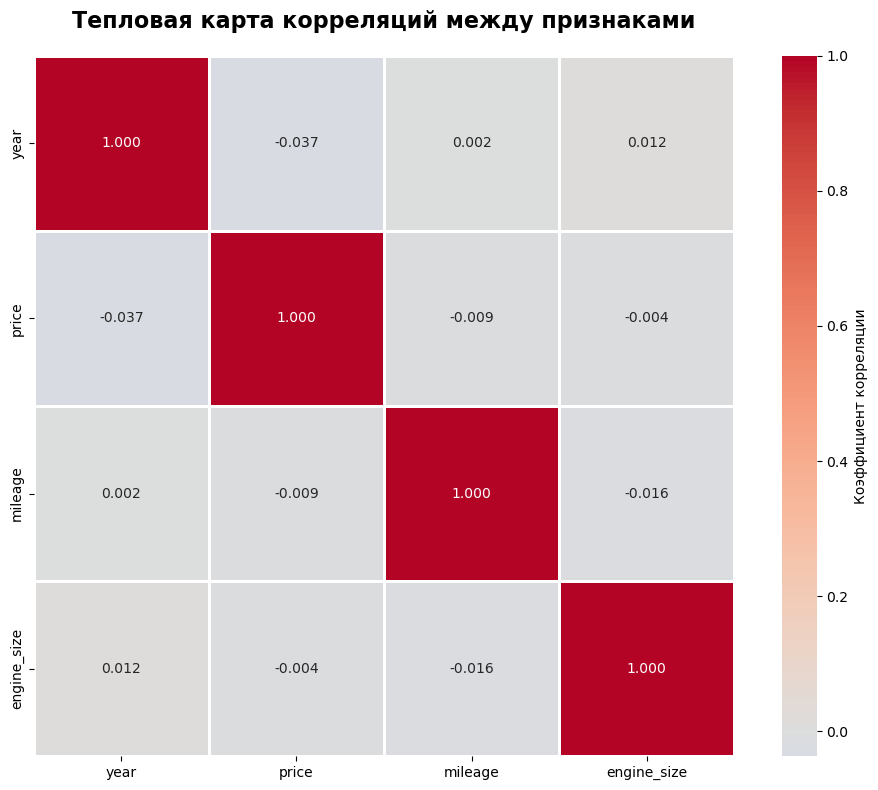

In [146]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.3f',
            square=True,
            linewidths=1,
            cbar_kws={'label': 'Коэффициент корреляции'})
plt.title('Тепловая карта корреляций между признаками', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()